# Воронова О. А. ИУ5-63Б
## Вариант 8
### Рубежный контроль 1
## Задача №1

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель. Доп заданние: для произвольной колонки данных построить график "Ящик с усами (boxplot)".



In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загружаем данные


In [106]:
data = pd.read_csv('googleplaystore.csv', sep=",")

In [107]:
# Узнаем размер нашеих данных
data.shape

(10841, 13)

In [108]:
# Типы колонок
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [109]:
# Определяем количество пропусков
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Из-за того что у нас есть пропуски, нужно переделать немного базу данных.

Мы можем понять, что Rating - числовой параметр, так как он важный и пропусков не очень много, то я удалю строки где этот параметр пустой


In [110]:
# Удаляем строки
data_new = data.dropna()
print(f"было удалено {data.shape[0]-data_new.shape[0]} строк")

было удалено 1481 строк


In [111]:
# Проверяем теперь пропуски
data_new.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [112]:
# Выведем первые 10 значений таблицы
data_new.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


## Так как у нас только одно целое поле, то мы переведем несколько дргуих полей тоде в численное значение - Price, Installs, Reviews, Size.

In [113]:
# Перевод Price в float
data_new.loc[:, 'Price'] = data_new.loc[:, 'Price'].map(lambda x: str(x).lstrip('$'))
data_new.loc[:, 'Price'] = pd.to_numeric(data_new.loc[:, 'Price'], errors='coerce', downcast='float')

In [114]:
# Перевод Installs в float
data_new.loc[:, 'Installs'] = data_new.loc[:, 'Installs'].map(lambda x: str(x).rstrip('+'))
data_new.loc[:, 'Installs'] = pd.to_numeric(data_new.loc[:, 'Installs'], errors='coerce', downcast='float')

In [115]:
# Перевод Reviews в int
data_new.loc[:, 'Reviews']=pd.to_numeric(data_new.loc[:, 'Reviews'])

In [116]:
# Перевод Size в float
data_new.loc[:, 'Size'] = data_new.loc[:, 'Size'].map(lambda x: str(x).rstrip('M'))
data_new.loc[:, 'Size'] = pd.to_numeric(data_new.loc[:, 'Size'], errors='coerce', downcast='float')

In [117]:
# Проверка на значения
data_new.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float32
Installs          float32
Type               object
Price             float32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [123]:
# Так как эти колонки не несут важной информации для оценки, а также имеют где-то множественные значениея, то мы их удалим
data_new.drop(columns=['Genres', 'Last Updated', 'Current Ver', 'Android Ver'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,NaN,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,NaN,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,NaN,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,NaN,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,NaN,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,NaN,Free,0.0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,NaN,Free,0.0,Mature 17+


# Проведем кореляционный анализ


<AxesSubplot:>

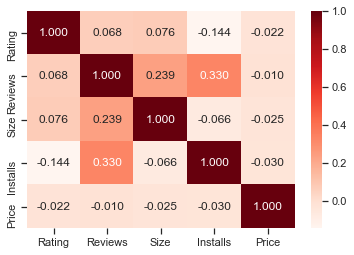

In [119]:
sns.heatmap(data_new.corr(), cmap='Reds', annot=True, fmt='.3f')

In [120]:
data_new.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068133,0.075691,-0.143847,-0.021919
Reviews,0.068133,1.000000,0.239191,0.330480,-0.009824
Size,0.075691,0.239191,1.000000,-0.065803,-0.025489
Installs,-0.143847,0.330480,-0.065803,1.000000,-0.030498
Price,-0.021919,-0.009824,-0.025489,-0.030498,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).
На основе корреляционной матрицы можно сделать следующие выводы:
 1. Rating наиболее сильно коррелирует с Size. Этот признак стоит оставить
 2. Также Rating коррелирует с Reviews, Installs с Reviews
 3. Целевой признак слабо коррелирует с остальными. Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.
 4. Price негативно влияет на остальные параметры из-за этого становится сложно оценить корреляию данных, так что стоит удалить этот параметр
 

# Ящик с усами(boxplot)

### Отображает одномерное распредление вероятности.

<AxesSubplot:xlabel='Rating'>

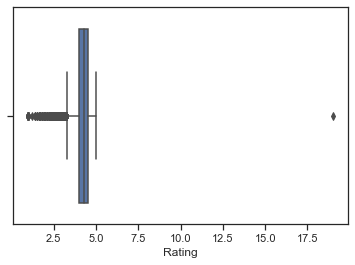

In [124]:
sns.boxplot(x=data['Rating'])

<AxesSubplot:ylabel='Rating'>

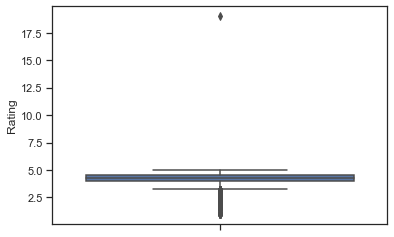

In [125]:
sns.boxplot(y=data['Rating'])